# <font color='blue'>TME ROBOTIQUE ET APPRENTISSAGE</font>
# <font color='blue'>Stratégies d'Evolution et Robotique Autonome</font>

<font color="red">Version étudiant 2021</font>

*mise à jour: 5/3/2021*

Ce notebook doit être exécuté dans [Google Colab](colab.research.google.com/)

Vous devez déposer votre travail sur Moodle:
* déposer votre notebook, avec le nom de fichier *obligatoirement* au format suivant: **RA_NOM1_NOM2.ipynb**
* toutes les cellules exécutées
* des graphes et un bref commentaire lorsque c'est demandé
* la partie C ne sera pas évaluée

*Le sujet est à faire en binome.*

# COMPLETEZ LES CHAMPS CI-DESSOUS AVEC NOM/PRENOM/CARTE_ETU:

* Étudiant 1: ** Zhuangzhuang Yang 28708351**
* Étudiant 2: ** Xin He 28706290**



# <font color='orange'>PARTIE A: optimisation dans un espace de recherche continu</font>

# Importation des librairies et définition des fonctions utiles pour la partie A

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie A.*

In [1]:
from datetime import datetime
from datetime import date
#import importlib # une seule fois
import sys
import random
import matplotlib.pyplot as plt
#from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from scipy.optimize import minimize

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:24:08 GMT
OK.


In [2]:
#!pip install numpy scipy matplotlib pandas sympy nose
!pip install deap
!pip install cma
#!pip install --user pygame

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:24:15 GMT
OK.


In [3]:
# plot

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import numpy as np
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random
from scipy.optimize import minimize


def plot_results(my_func, my_points, min_x=-30, max_x=30, min_y=-30, max_y=30, nbx=100, nby=100, title="Title"):
    """Plots a 2D function with a heatmap and the points given as argument are plotted on top of it

    Plots a 2D function with a heatmap and the points given as argument are plotted on top of it:
    :param my_func: the function to plot on the background
    :param my_points: the points to plot
    :param min_x: min value of x
    :param max_x: max value of x
    :param min_y: min value of y
    :param max_y: max value of y
    :param nbx: number of my_func samples on the X-axis
    :param nby: number of my_func samples on the Y-axis
    :param title: title of the figure
    """
    X = np.linspace(min_x, max_x, num=nbx)
    Y = np.linspace(min_y, max_y, num=nby)
    Z=np.zeros((nbx,nby),dtype=np.double)
    for i in range(nbx):
        for j in range(nby):
            Z[i][j]=my_func([X[i],Y[j]])
    fig,ax=plt.subplots(figsize=(5,5))
    ax.set_xlim(min_x,max_x)
    ax.set_ylim(min_y,max_y)
    ax.imshow(Z, cmap='hot', interpolation='nearest',extent=(min_x,max_x,min_y,max_y))
    
    #print("Points: "+str(my_points))
    x=[]
    y=[]
    for p in my_points:
        x.append(p[0])
        y.append(p[1])

    ax.plot(x,y,".")
    ax.set_title(title)
    plt.show()

def plot_violin(res):
    """ Makes a violin plot of the results provided in the argument

    Makes a violin plot of the results provided in the argument.
    :param res: dictionary of the results to plot. The key is the name and the data is a vector of performance values.
    """
    fig,ax=plt.subplots(figsize=(5,5))
    data=[]
    labels=[]
    for k in res.keys():
        data.append(res[k])
        labels.append(k)
    ax.violinplot(data,
                   showmeans=False,
                   showmedians=True)
    ax.set_title('Violin plot')
    # adding horizontal grid lines
    ax.yaxis.grid(True)
    ax.set_xticks([y + 1 for y in range(len(data))])
    ax.set_xlabel('Optimization methods')
    ax.set_ylabel('Best value found')

    # add x-tick labels
    plt.setp(ax, xticks=[y + 1 for y in range(len(data))],
        xticklabels=labels)
    plt.setp(ax.get_xticklabels(), rotation=30, ha="right")
    plt.show()
  
print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:24:16 GMT
OK.


In [4]:
# myEvalFn
# requires: CMA

import sys
import cma
import cma.purecma as purecma
from deap import benchmarks

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]


#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:24:16 GMT
OK.


In [5]:
# myEvalFn

def ackley(x):
    return benchmarks.ackley(x)[0]

def sphere(x):
    return benchmarks.sphere(x)[0]

def rastrigin(x):
    return benchmarks.rastrigin(x)[0]

init_pSG = False # WARNING: pSG.initAll() should NEVER be called BEFORE calling explore(.)
def explore(x):  # NOTE: display should be false whenever an optimiser is called
    global init_pSG
    if init_pSG == False:
        pSG.initAll()
        init_pSG = True
    return -pSG.evaluate(x)   # remember: we minimise!

#### #### ####

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:24:16 GMT
OK.


---

# Exercice A-0: recherche au hasard

Etudiez le code ci-dessous. Il s'agit d'un algorithme de recherche aléatoire, qui explore l'environnement naïvement et stocke le meilleur score obtenu jusqu'ici. Vous testerez cette bibliothèque sur la fonction de Sphere, Ackley, puis Rastrigin, en dimension 2 pour l'instant. Observez l'évolution de la population. Vous étudierez l'impact du choix du point initial. **Le code se trouve le fichier `myRandom.py`**.

In [6]:
# fourni a titre d'exemple, ne pas modifier -- reprendre ce code et le modifier dans les cellules suivantes pour répondre aux questions.

def launch_random(center, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(center)
    i=0
    j=0
    parentFit = ma_func(parent)
    bestFit = parentFit
    bestIt = 0
    while i<nbeval:
        child = np.random.uniform(-20,20,len(center))
        childFit = ma_func(child)
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        j+=1
        solutions = np.array([parent])
        if display and ((j<10) or (j%500==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(j))
        i+=1
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit



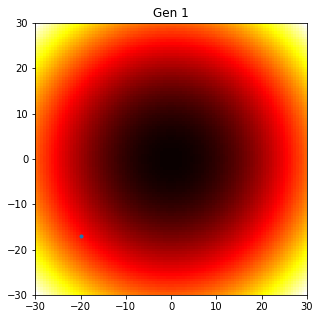

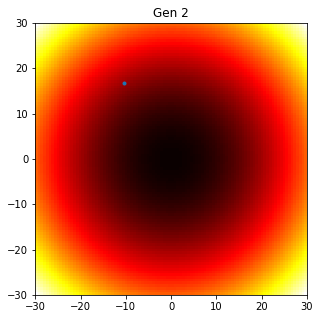

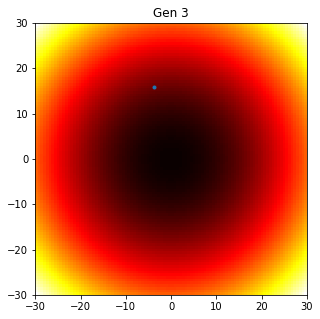

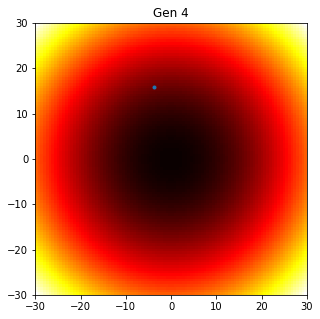

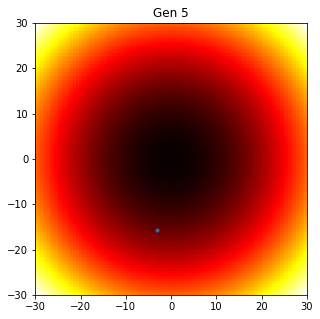

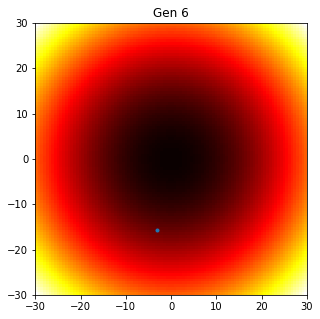

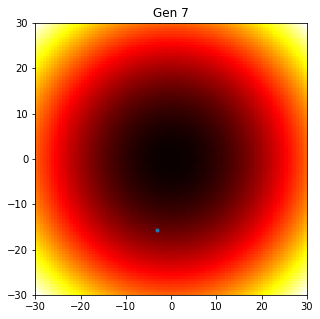

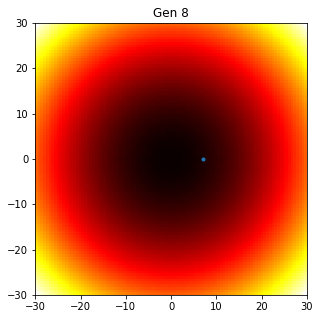

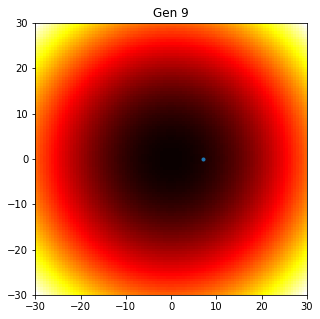

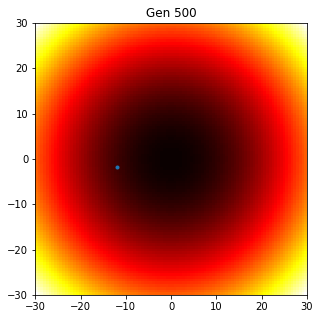

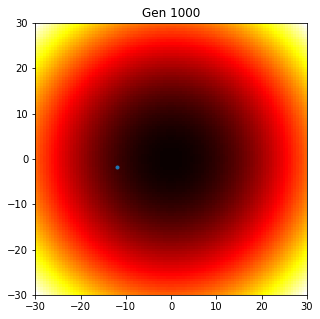

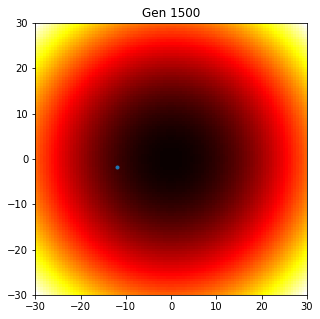

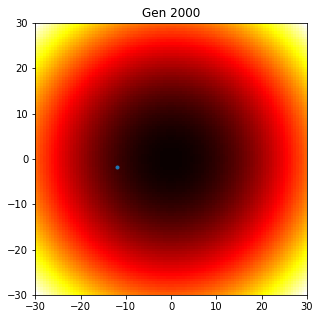

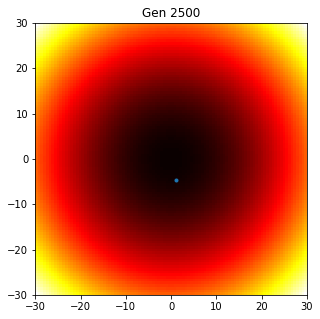

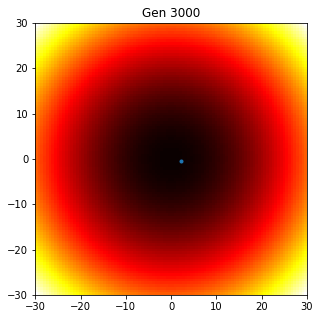

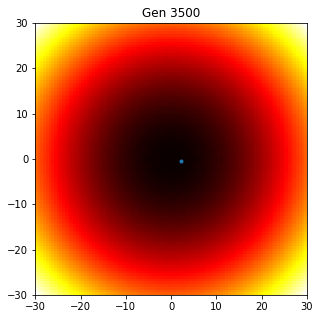

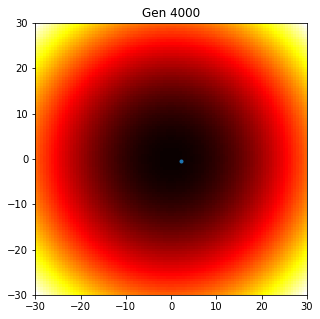

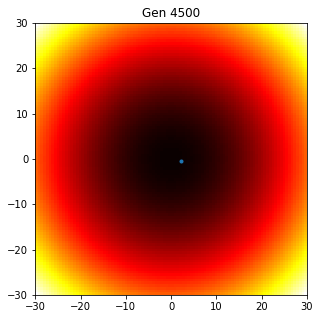

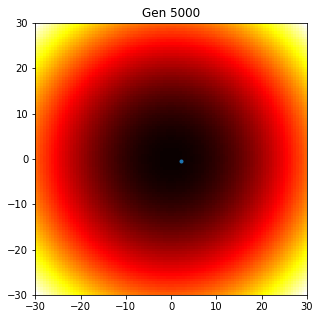

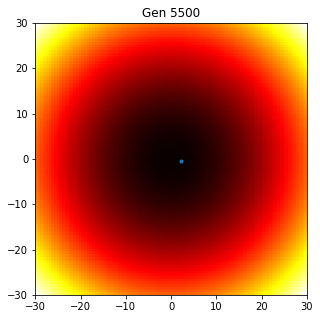

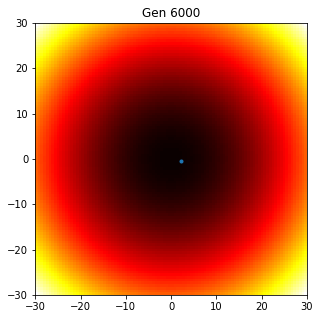

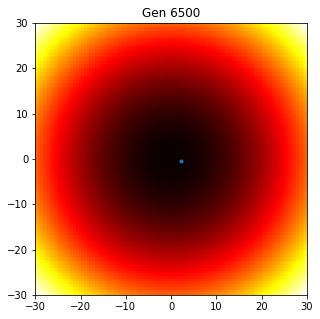

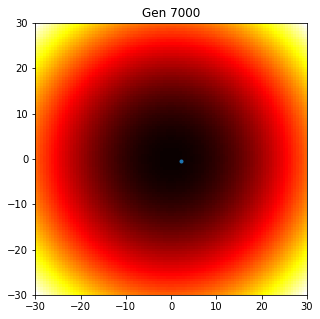

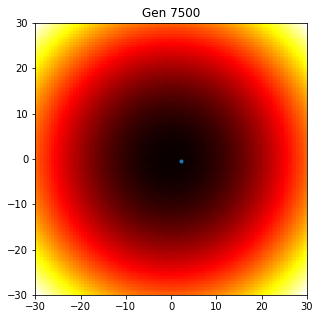

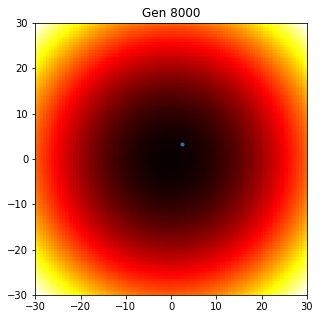

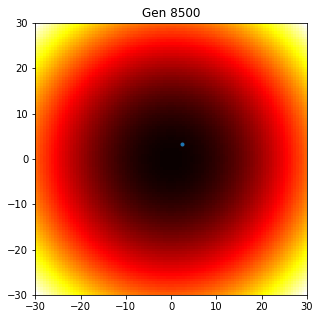

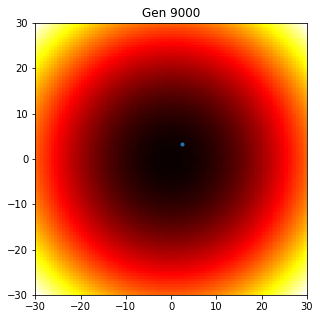

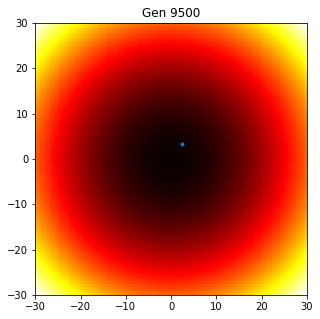

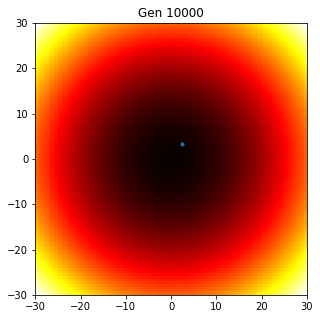

Best fit 614.7823383911499 at iteration 7732
Terminé.


In [7]:
launch_random([20]*16,ma_func=sphere)

print ("Terminé.")

Etudier avec sphere:

On a trouvé que la solution approche de plus en plus le centre.

Avec un point initial plus approché du center:la solution change moins fréquemment,car c'est plus difficile de trouver une meilleure solution par hasard,et ça change rien pour le bestFit. Si on met $[20]*16$ , on trouve son iteration = 3461 et son bestfit =486

In [8]:
launch_random([10.5]*16,display=False,ma_func=ackley) 

print ("Terminé.")

Best fit 15.87686285785576 at iteration 4128
Terminé.


Etudier avec ackley:

Cette fonction teste une objective fonction, il se trouve le min à $ (0)^n $,  si les points initiaux est  $[5]*16$,  des points dévelppe inevident, let son teration =0, mais si les points initiaux est $[10.5]*16$, iteration = 862 et les points change rapidement. On vois que le point noir change rapidement vers le centre.

In [9]:
launch_random([10.5]*16,ma_func=rastrigin,display= False)

print ("Terminé.")

Best fit 675.4779600136364 at iteration 2869
Terminé.


Etudier avec rastrigin:

Cette fonction comporte une cosin fonction, donc l'evolution de cosin impact  son l'évaluation, par example, si on mettre $[10]*16$ et $[10.5]*16$ les deux groupes des points initiaux, et apres plusieur fois de tests, on vois qu'il a plus rapide convergence avec points initiaux $[10.5]*16$ car $cos(2\pi * 10.5)$=-1 qui est le min de la fonction cos. Et on vois le point noir deplace vers le centre.

---

# Exercice A-1: algorithme (1+1)-ES

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma fixe.

Vous testerez cet algorithme sur les mêmes fonctions que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

A noter que si la valeur de sigma peut influer significativement l'optimisation, l'initialisation compte aussi. Par exemple, si la solution initialement proposée se trouve dans une région ressemblant à un plateau (ie. plusieurs solutions proches obtiennent le même score), il sera difficile d'améliorer cette solution puisqu'une recherche locale s'apparentera à une marche aléatoire.

In [10]:
def launch_oneplusone(center, sigma, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(center)
    i=0
    j=0
    parentFit = ma_func(parent)
    bestFit = parentFit
    bestIt = 0
    taille =len(center)
    while i<nbeval:
        id = np.identity(taille)
        child = np.copy(parent)
        child = child + np.diag(sigma * np.random.normal([[0]*16]*16,np.identity(taille)))
        childFit = ma_func(child)
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        j+=1
        solutions = np.array([parent])      

        if display and ((j<10) or (j%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(j))
            
        i+=1
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit



In [11]:
launch_oneplusone([20]*16,0.1,display=False,ma_func=sphere)

Best fit 0.046939161048067723 at iteration 6715


0.046939161048067723

In [12]:
launch_oneplusone([20.5]*16,1,display=False,ma_func=ackley)

Best fit 20.61755454142571 at iteration 4179


20.61755454142571

In [13]:
launch_oneplusone([10.5]*16,1,display=False,ma_func=rastrigin)

Best fit 121.59050719414552 at iteration 2525


121.59050719414552

Apres implemente cette methode, voila l'analyse d'evolution des trois functions:

Pour ackley: on a trouve si on pose les points initiaux  $[20]*16$, le bestFit=19. avec n'importe quelle valeur de sigma. Si on met les points initiaux  $[10.5]*16$ le bestFit =3.75, et si on choisi sigma plus petie (ex: sigma=0.1) le bestFit = 17, et par augmente la valeur de sigma, la valeur de bestFit diminue, mais si la valeur de sigma est plus de 1, bestFit augmente depuis son minimal. Et on vois que le point vert se déplacer dans le sens horizontal ou vertical.

Pour sephere: Choisi des points initials presque n'ont pas une impact pour le resultat bestFit. Pour la valeur de sigma, si on met sigma=0.1 on presque trouve son minimal, la valeur de bestFit augmente si la valeur de sigma diminue ou augmente. Et on vois que le point noir deplace ver la centre presque linearement, si le sigma est plus grande le point noir a une plus long de distance de deplacement.

Pour rastrgin: On vois que le point noir deplace vers la centre, si sigma est petie donc son distance de deplacement est petie.


---

# Exercice A-2: algorithme (1+1)-ES, règle des 1/5e

Nous allons maintenant implementer une stratégie d'évolution (1+1)-ES avec un sigma suivant la règle des 1/5e.

Vous testerez cette algorithme sur les mêmes fonction que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma.

In [14]:
def launch_ESonefifthRule(center, sigma, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(center)
    i=0
    j=0
    parentFit = ma_func(parent)
    bestFit = parentFit
    bestIt = 0
    taille =len(center)
    while i<nbeval:
        id = np.identity(taille)
        child = np.copy(parent)
        child = child + np.diag(sigma * np.random.normal([[0]*16]*16,np.identity(taille)))
        childFit = ma_func(child)
        if childFit <= parentFit:
            parentFit = childFit
            parent = np.copy(child)
            sigma=2*sigma
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        else:
            sigma=np.power(2,-1/4)*sigma
        j+=1
        solutions = np.array([parent])      

        if display and ((j<10) or (j%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(j))
            
        i+=1
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit

print ("Terminé.")


Terminé.


In [15]:
launch_ESonefifthRule([20]*16,100,display=False,ma_func=rastrigin)

Best fit 118.39921465028408 at iteration 2298


118.39921465028408

Pour la fonction de ackley et shpere, changement de la valeur sigma et changement des points initiaue  presque n'ont pas une impact pour la valeur de BestFit et la deplacement du point noir. Mais pour la fonction de rastrigin, on vois pas une resultat claire parce que la valeur de BestFit change evidement si on rexecution la fonction, et globalement le point noir deplacer vers la centre.

---

# Exercice A-3: algorithme (mu,lambda)-ES

Vous testerez cette algorithme sur les mêmes fonction que précédemment. Vous tracerez l'évolution de la population pour chaque exécution. Vous étudierez l'impact du choix du point initial et du sigma. 

In [16]:
def launch_LambdaES(center, _lambda, sigma, nbeval=10000, display=True, ma_func=sphere):
    parent = np.array(center)
    i=0
    j=0
    parentFit = ma_func(parent)
    bestFit = parentFit
    bestIt = 0
    taille =len(center)
    while i<nbeval:
        id = np.identity(taille)
        child = []
        childFit = np.zeros((_lambda))
        for k in range(_lambda):
          child.append(np.copy(parent) + np.diag(sigma * np.random.normal([[0]*16]*16,np.identity(taille))))
          childFit[k] = (ma_func(child[k]))
        childBestFit = np.min(childFit)
        #print(np.where(childFit == childBestFit)[0][0])
        childBest = child[np.where(childFit == childBestFit)[0][0]]
        if childBestFit <= parentFit:
            parentFit = childBestFit
            parent = np.copy(childBest)
            sigma=2*sigma
            if bestFit > parentFit:
                bestFit = parentFit
                bestIt = i
        else:
            sigma=np.power(2,-1/4)*sigma
        j+=1
        solutions = np.array([parent])      

        if display and ((j<10) or (j%100==0)):
            plot_results(ma_func,solutions, title="Gen %d"%(j))
            
        i+=1
    print ("Best fit",bestFit,"at iteration",bestIt)
    return bestFit



In [17]:
launch_LambdaES([100]*16,5,100,display=False,ma_func=sphere)
print ("Terminé.")

Best fit 1.7490316306621008e-129 at iteration 9999
Terminé.


In [18]:
launch_LambdaES([20]*16,15,1000,display=False,ma_func=ackley)
print ("Terminé.")

Best fit 19.633662210601795 at iteration 1896
Terminé.


In [19]:
launch_LambdaES([30]*16,15,0.1,display=False,ma_func=rastrigin)
print ("Terminé.")

Best fit 73.62672786318569 at iteration 1233
Terminé.


Pour la fonction shpere: changement de sigma ou des points initiaux n'ont pas une impact pour la valeur de BestFit et l'evolution du point noir.

Pour la fonction rastrgin, changement de sigma ou des points initiaux ont une moin evident impact pour la valeur de BestFit et l'evolution du point noir compare avec l'algorithme precedent.

Pour la fonction ackley, choix des points initiaux a une impact pour le resultat, si on a choisi des points initiaux par example $[20]*16$, on vois que le point noir ne deplace pas avec n'importe quel valeur de sigma.

---

# Exercice A-4: algorithme CMA-ES

Nous allons maintenant utiliser CMA-ES. La version standard est celle proposée dans la bibliothèque pycma (https://github.com/CMA-ES/pycma).

Vous testerez cette bibliothèque sur les mêmes fonctions que précédemment, toujours en dimension 2 pour l'instant. De même que précédemment, vous tracerez l'évolution de la population pour chaque exécution. 

Vous étudierez l'impact du choix du point initial et du sigma. Vous comparerez également la version complète avec la version pureCMA, qui n'inclut pas certains mécanismes comme le restart. 

In [20]:
def launch_cmaes_full(center, sigma, nbeval=10000, display=True, ma_func=rastrigin):
  aux = cma.CMAEvolutionStrategy(center, sigma).optimize(ma_func,maxfun=nbeval).result[1]
  return aux
aux = launch_cmaes_full([100]*16,0.1,display=True)
print(aux)
print ("Terminé.")

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=843431, Thu Mar 25 16:25:13 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 1.599278726600689e+05 1.0e+00 9.10e-02  9e-02  9e-02 0:00.0
    2     24 1.598442803969260e+05 1.1e+00 8.78e-02  9e-02  9e-02 0:00.0
    3     36 1.597664201351634e+05 1.1e+00 9.08e-02  9e-02  9e-02 0:00.0
  100   1200 2.657703513057701e+02 2.2e+00 2.83e+00  2e+00  2e+00 0:00.3
  200   2400 1.304360344503916e+02 2.7e+00 1.13e+00  6e-01  1e+00 0:00.7
  300   3600 2.998630924720140e+01 2.2e+00 1.41e-02  6e-03  8e-03 0:01.0
  400   4800 2.984874386736556e+01 2.1e+00 7.88e-05  2e-05  3e-05 0:01.3
  500   6000 2.984874148589466e+01 1.9e+00 3.31e-07  6e-08  8e-08 0:01.6
  550   6600 2.984874148588432e+01 1.8e+00 2.25e-08  3e-09  4e-09 0:01.8
29.84874148588429
Terminé.


In [21]:
# does not use restart
def launch_cmaes_pure(center, sigma, nbeval=10000, display=True, ma_func=sphere):
  aux = purecma.fmin(ma_func,center,sigma,maxfevals=nbeval)[0]
  return ma_func(aux)
print(launch_cmaes_pure([100]*16,0.1,display=True,ma_func=rastrigin))

print ("Terminé.")

evals: ax-ratio max(std)   f-value
   12:     1.0  9.8e-02  159886.1410940824
   24:     1.0  1.0e-01  159872.0308101488
 1200:     1.8  2.2e+00  232.36390103524582
 2400:     2.3  3.4e-01  109.81315025429905
 3600:     2.3  4.5e-03  23.928039697214444
 4800:     1.9  1.6e-05  23.878997861692795
 6000:     1.8  9.5e-08  23.878997218991003
 6468:     1.9  1.5e-08  23.87899721896335
termination by {'tolfun': 1e-12}
best f-value = 23.878997218963093
solution = [0.9949586325965216, 2.3796017788860053e-08, 0.9949586359407595, -4.615894279967923e-10, 1.9899122417638022, 7.76904268923859e-09, 1.9899122272553456, -0.9949586570068186, 0.9949586459968353, 1.7569005046428425e-08, 0.9949586419708718, 0.9949586294706468, -0.9949586349134534, -0.9949586340128791, 1.9899122406488146, 1.9899122531680782]
23.878997218963093
Terminé.


Pour la fonction sphere: les deux fonction a presque la meme performance, et changement de la valeur de sigma et des points initiaux n'ont pas une evidente impact.

Pour la fonction ackley: les deux fonction a presque la meme performance, et si les points initiaux sont grandes(par example$[100]*16$), on a essaye plusieurs valeurs de sigma mais son bestFit toujours egale 20. , et changement de la valeur de sigma a une impact, la valeur de bestFit diminue si la valeur de sigma augmente avant son meilleur valeur et la valeur de bestFit diminue si la valeur de sigma augmente apres son meilleur valeur. 

Pour la fonction rastrigin: les deux fonction a presque la meme performance.Et changement de la valeur de sigma et des points initiaux a une impact presque inevident( range de resultat inferieur 5).

---

# Exercice A-5: stabilité des algorithmes d'optimisation stochastique

Vous allez maintenant comparer la stochasticité des algorithmes. Pour cela, observez le code ci-dessous, qui affiche le résultat de plusieurs exécutions du même algorithme de recherche aléatoire sous forme de violin graph. Utilisez la fonction Sphere, tester aussi avec la fonction Rastrigin. 


Best fit 744.029230477578 at iteration 529
Best fit 874.0080501768806 at iteration 331
Best fit 702.6876336290968 at iteration 640
Best fit 655.1290847183766 at iteration 953
Best fit 846.3653678937447 at iteration 493
Best fit 720.5377760439343 at iteration 660
Best fit 795.0483698413088 at iteration 73
Best fit 710.5134435735105 at iteration 594
Best fit 891.0431007391755 at iteration 283
Best fit 861.4276825288846 at iteration 483
Best fit 610.103304850168 at iteration 819
Best fit 813.2962985027987 at iteration 739
Best fit 854.7280677662898 at iteration 582
Best fit 730.862048557063 at iteration 144
Best fit 683.0339232831087 at iteration 826
Best fit 648.6814385799508 at iteration 347
Best fit 810.9626268719918 at iteration 422
Best fit 661.4954024320407 at iteration 152
Best fit 799.5066058655494 at iteration 629
Best fit 890.0006312905263 at iteration 265
Best fit 881.9421325993471 at iteration 261
Best fit 815.7187648180047 at iteration 42
Best fit 811.0249151879567 at iterati

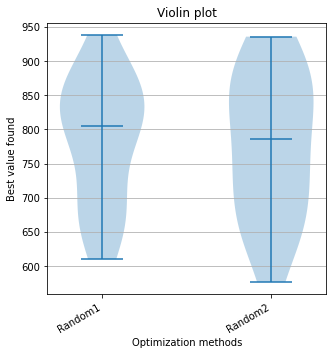

Terminé.


In [22]:
# fourni a titre d'exemple, ne pas modifier -- répondre dans la cellule suivante.

resRandom1 = []
resRandom2 = []

evaluationBudget = 1000
centerInit = [20]*16
evalFunc = sphere

for i in range(20):
    resRandom1.append(launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc))
    resRandom2.append(launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc))    
  
allResults = {"Random1":resRandom1,"Random2":resRandom2}
print(allResults)
plot_violin( allResults )

print ("Terminé.")


Testez la robustesse de CMA-ES sur plusieurs exécutions sur ces deux fonctions. Vous pouvez ré-utiliser le code de la cellule précédente pour afficher le résultat de plusieurs exécutions de CMAES (ex.: 5 exécutions).

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=820351, Thu Mar 25 16:25:19 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 6.163283722361959e+03 1.0e+00 9.24e-01  9e-01  9e-01 0:00.0
    2     24 6.110707526666538e+03 1.1e+00 9.02e-01  9e-01  9e-01 0:00.0
    3     36 5.909821119607034e+03 1.2e+00 9.69e-01  9e-01  1e+00 0:00.0
  100   1200 4.406651751022641e-01 1.9e+00 1.94e-01  1e-01  2e-01 0:00.3
  200   2400 1.069432626806337e-06 1.8e+00 6.09e-04  3e-04  3e-04 0:00.6
  300   3600 2.077867735269856e-12 1.8e+00 1.20e-06  3e-07  4e-07 0:00.9
  342   4104 1.504194712056576e-14 1.8e+00 1.28e-07  3e-08  4e-08 0:01.1
evals: ax-ratio max(std)   f-value
   12:     1.0  9.6e-01  6049.422591923037
   24:     1.0  9.4e-01  6012.750966447096
 1200:     1.7  1.5e-01  0.37135703060420455
 2400:     1.7  4.9e-04  2.4027021471121537e-06
 3600:     1.7  2.0e-06  3.357166683328791e-11
 4068:     1.7  2.2e-07  4.475283829745598e-13
termination by {'

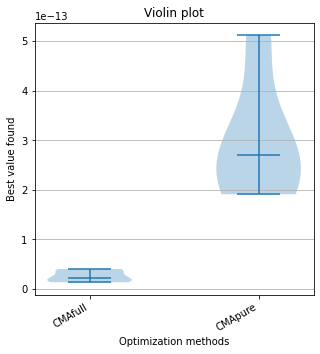

Terminé.


In [23]:
# fourni a titre d'exemple, ne pas modifier -- répondre dans la cellule suivante.

resCMAfull = []
resCMApure = []

evaluationBudget = 10000
centerInit = [20]*16
evalFunc = sphere
sigma = 1

for i in range(5):
  aux = launch_cmaes_full(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)
  resCMAfull.append(aux)
  resCMApure.append(launch_cmaes_pure(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc))    

allResults = {"CMAfull":resCMAfull,"CMApure":resCMApure}

plot_violin(allResults)

print ("Terminé.")

On compare les deux fonctions pour 

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=731508, Thu Mar 25 16:28:48 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 6.277300122893364e+03 1.0e+00 4.63e-01  5e-01  5e-01 0:00.0
    2     24 6.114527047660988e+03 1.1e+00 4.96e-01  5e-01  5e-01 0:00.0
    3     36 6.061152332350203e+03 1.2e+00 5.61e-01  5e-01  6e-01 0:00.0
  100   1200 2.116377614079810e-01 1.7e+00 2.04e-01  1e-01  2e-01 0:00.3
  200   2400 5.658199133865196e-06 1.9e+00 1.15e-03  5e-04  6e-04 0:00.6
  300   3600 9.390290729219942e-11 2.0e+00 7.46e-06  2e-06  3e-06 0:00.9
  365   4380 3.818262339329388e-14 1.8e+00 2.21e-07  5e-08  6e-08 0:01.1
evals: ax-ratio max(std)   f-value
   12:     1.0  4.9e-01  6221.404067586684
   24:     1.0  5.3e-01  6104.001106412631
 1200:     1.5  2.2e-01  0.6490659391314602
 2400:     1.7  6.9e-04  8.434313487239476e-06
 3600:     1.7  2.2e-06  5.2995879491727497e-11
 4056:     1.7  2.5e-07  8.790031972316747e-13
termination by {'t

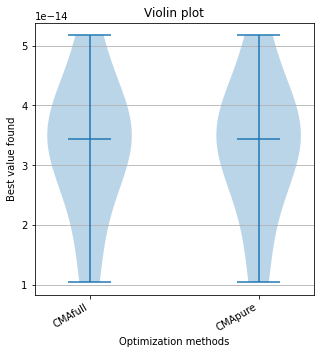

Terminé.


In [26]:
resCMAfull = []
resCMApure = []

evaluationBudget = 10000
centerInit = [20]*16
evalFunc = sphere
sigma = 0.5

for i in range(10):
  aux = launch_cmaes_full(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)
  resCMAfull.append(aux)
  auxn= launch_cmaes_pure(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)
  resCMApure.append(aux)    

allResults = {"CMAfull":resCMAfull,"CMApure":resCMApure}

plot_violin( allResults )

print ("Terminé.")

In [ ]:
resCMAfull = []
resCMApure = []

evaluationBudget = 10000
centerInit = [20]*16
evalFunc = rastrigin
sigma = 0.5

for i in range(10):
  aux = launch_cmaes_full(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)
  resCMAfull.append(aux)
  resCMApure.append(launch_cmaes_pure(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc))    

allResults = {"CMAfull":resCMAfull,"CMApure":resCMApure}

plot_violin( allResults )

print ("Terminé.")

Pour la fonction ackley: on voit que la methode CMApure a une meilleur performance car il a plus des meilleur valeurs trouvees que la methode CMAfull.

Pour la fonction sphere:on voit que la methode CMAfull a une meilleur performance car il a trouvee des valeurs presque 0 mais la methode trouves des valeurs entre 0.4 et 3 si on utiliser la meme sigma.

Pour la fonction rastringin: on voit que la methode CMAfull a une meilleur performance car il a trouvee des valeurs entre 10 et 30 mais la methode CMApure trouvee des valeurs entre 100 et 140.





# Exercice A-6: comparaison entre les algorithmes

 Vous allez maintenant comparer tous les algorithmes précédents en traçant les résultat sur une même figure. Sur la même figure, vous tracerez aussi les résultats de deux méthodes classiques d'optimisation: Nelder-Mead et Powell (cf. **fichier `myCMA.py`**).  Vous pouvez tout écrire dans la cellule ci-dessous.

_Remarque: Pour que les comparaisons soient équitables, il faut que les points de départ des optimisation "classiques" soient similaires. Vous pourrez éventuellement ajouter un diagramme représentant le nombre d'évaluation par méthode._

(6_w,12)-aCMA-ES (mu_w=3.7,w_1=40%) in dimension 16 (seed=767278, Thu Mar 25 17:25:59 2021)
Iterat #Fevals   function value  axis ratio  sigma  min&max std  t[m:s]
    1     12 6.310797757054371e+03 1.0e+00 9.91e-01  1e+00  1e+00 0:00.0
    2     24 6.006532700640089e+03 1.2e+00 1.05e+00  1e+00  1e+00 0:00.0
    3     36 5.591792851310527e+03 1.2e+00 1.15e+00  1e+00  1e+00 0:00.0
  100   1200 1.435938205463516e+02 2.0e+00 9.11e-01  7e-01  8e-01 0:00.3
  200   2400 6.523613249509469e+01 3.1e+00 1.44e-01  8e-02  1e-01 0:00.7
  300   3600 4.477518214380154e+01 2.1e+00 1.86e-03  8e-04  1e-03 0:01.0
  400   4800 4.477307185096014e+01 1.9e+00 6.73e-06  2e-06  2e-06 0:01.3
  500   6000 4.477307183539753e+01 1.9e+00 1.31e-08  2e-09  3e-09 0:01.6
  506   6072 4.477307183539753e+01 1.9e+00 9.77e-09  2e-09  2e-09 0:01.7
evals: ax-ratio max(std)   f-value
   12:     1.0  9.6e-01  6321.172615627068
   24:     1.0  9.9e-01  6137.581675160921
 1200:     2.0  7.4e-01  158.87529025076398
 2400:     2.0

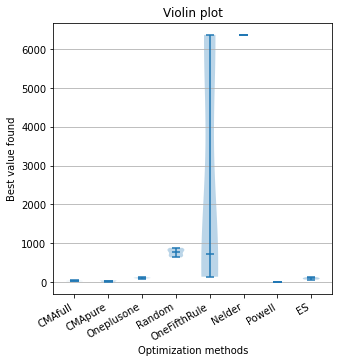

Terminé.


In [87]:
resCMAfull = []
resCMApure = []
resOneplusone = []
resRandom = []
resOneFifthRule = []
resNelder = []
resPowell = []
resLambdaES=[]

evaluationBudget = 10000
centerInit = [20]*16
evalFunc = rastrigin
sigma = 1



for i in range(10):
  resCMAfull.append(launch_cmaes_full(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc))
  resCMApure.append(launch_cmaes_pure(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc)) 
  resOneplusone.append(launch_oneplusone(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc))    
  resRandom.append(launch_random(centerInit,nbeval=evaluationBudget,display=False,ma_func=evalFunc))    
  resOneFifthRule.append(launch_ESonefifthRule(centerInit,sigma,nbeval=evaluationBudget,display=False,ma_func=evalFunc))    
  resNelder.append(minimize(fun=evalFunc,method='Nelder-Mead',x0=centerInit,options={'maxiter':evaluationBudget} ).fun)
  resPowell.append(minimize(fun=evalFunc,method='Powell',x0=centerInit,options={'maxiter':evaluationBudget} ).fun)
  resLambdaES.append(launch_LambdaES(center=centerInit, _lambda=10,sigma=sigma, nbeval=evaluationBudget,display=False,ma_func=evalFunc))


allResults = {"CMAfull":resCMAfull,"CMApure":resCMApure,"Oneplusone":resOneplusone,"Random":resRandom,"OneFifthRule":resOneFifthRule,"Nelder":resNelder,"Powell":resPowell,"ES":resLambdaES}
plot_violin( allResults )

print ("Terminé.")

Teste avec fonction sphere: on voit que la methode Nelder a pire performance car son meilleur valeurs trouvees sont presque 6500, mais les methodes CMAfull, CMApure et  Powell ont les meilleurs performance car leur meilleurs valeurs trouvees sont environ 0, et les methodes Oneplusone et lambdaES ont une performance pas mal aussi.

Teste avec fonction ackley: On trouve les methode Oneplusone, Nelder, Powell et LambdaES ont les pires performance car leur meilleurs valeurs trouvees sont environ 20. Et la methode random est meilleur que les methodes precedent car son meilleur valeurs trouvees entre 12.5 et 16. Les methodes CMAfull et CMApure ont les meilleurs performance, leur meilleurs valeurs trouvess sont dans rangement 0 et 20 mais la plus part est dans 0 et 7.5.

Teste avec fonction rastringin: On trouve que les methodes CMAfull, CMApure et Powell ont les meilleurs performance et leur meilleurs valeurs trouvees sont environ 0. Les methodes Oneplusone et LambdaES sont un peu moins meilleurs car leur meilleurs valeurs trouvess sont environ 100. La methode Nelder est la pire parce que son meilleurs valeurs trouvess sont environt 6500. Et la methode OneFifthRule est moin pire et son meilleurs valeurs trouves sont dans rangement 400 a 6500.

---
---
---

# <font color='orange'>PARTIE B: optimisation d'un pendule inversé</font>

OpenAI Gym (https://gym.openai.com/) est un framework permettant de lancer facilement des expériences d'apprentissage par renforcement. Nous allons l'utiliser pour tester les algorithmes évolutionnistes. Pour cet exercice, vous êtes laissé en autonomie: vous devez donc lire attentivement la documentation et les exemples.

# Importation des librairies et définition des fonctions utiles pour la partie B

Remarque: *Il est nécessaire d'exécuter ces cellules une seule fois. En cas de redémarrage du noyau, il faut relancer ces cellules. Il n'est pas nécessaire de regarder le code de ces cellules, elles servent seulement de soutien à la partie B.*

In [27]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D

#remove " > /dev/null 2>&1" to see what is going on under the hood
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1
from pyvirtualdisplay import Display
display = Display(visible=0, size=(1400, 900))
display.start()

!apt-get update > /dev/null 2>&1
!apt-get install cmake > /dev/null 2>&1
!pip install --upgrade setuptools 2>&1
!pip install ez_setup > /dev/null 2>&1
!pip install gym[atari] > /dev/null 2>&1

from datetime import datetime
from datetime import date

from gym.wrappers import Monitor
import base64
import glob
import io
import base64
from IPython.display import HTML
from IPython import display as ipythondisplay

import gym
from gym import logger as gymlogger
from gym.wrappers import Monitor
gymlogger.set_level(40) #error only
import tensorflow as tf
import numpy as np
import random
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import math
import glob
import io
import base64
from IPython.display import HTML

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")

Requirement already up-to-date: setuptools in /usr/local/lib/python3.7/dist-packages (54.2.0)

 2021-03-25 16:29:42 GMT
OK.


In [28]:
# source: https://colab.research.google.com/drive/124koV4mf1tQ4av9jAJJuWsyuhJyLyd70#scrollTo=G9UWeToN4r7D
# modification mineur: ajout de l'argument loop dans la fonction show_video(loop=True)

"""
Utility functions to enable video recording of gym environment and displaying it
To enable video, just do "env = wrap_env(env)""
"""

def show_video(loop=True):
  mp4list = glob.glob('video/*.mp4')
  if len(mp4list) > 0:
    mp4 = mp4list[0]
    video = io.open(mp4, 'r+b').read()
    encoded = base64.b64encode(video)
    if loop == True:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                loop controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
    else:
      ipythondisplay.display(HTML(data='''<video alt="test" autoplay 
                controls style="height: 400px;">
                <source src="data:video/mp4;base64,{0}" type="video/mp4" />
             </video>'''.format(encoded.decode('ascii'))))
  else: 
    print("Could not find video")
    
def wrap_env(env):
  env = Monitor(env, './video', force=True)
  return env

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:29:42 GMT
OK.


In [29]:
# A simple neural network object
# source: https://github.com/AsmaBRZ/Evolutionary-algorithms/blob/master/fixed_structure_nn_numpy.py

# coding: utf-8

import numpy as np

## Suppress TF info messages

import os

def sigmoid(x):
    return 1./(1 + np.exp(-x))

def tanh(x):
    return np.tanh(x)


def gen_simplemlp(n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5):
    n_neurons = [n_neurons_per_hidden]*n_hidden_layers if np.isscalar(n_neurons_per_hidden) else n_neurons_per_hidden
    i = Input(shape=(n_in,))
    x = i
    for n in n_neurons:
        x = Dense(n, activation='sigmoid')(x)
    o = Dense(n_out, activation='tanh')(x)
    m = Model(inputs=i, outputs=o)
    return m
    

class SimpleNeuralControllerNumpy():
    def __init__(self, n_in, n_out, n_hidden_layers=2, n_neurons_per_hidden=5, params=None):
        self.dim_in = n_in
        self.dim_out = n_out
        # if params is provided, we look for the number of hidden layers and neuron per layer into that parameter (a dicttionary)
        if (not params==None):
            if ("n_hidden_layers" in params.keys()):
                n_hidden_layers=params["n_hidden_layers"]
            if ("n_neurons_per_hidden" in params.keys()):
                n_neurons_per_hidden=params["n_neurons_per_hidden"]
        self.n_per_hidden = n_neurons_per_hidden
        self.n_hidden_layers = n_hidden_layers
        self.weights = None 
        self.n_weights = None
        self.init_random_params()
        self.out = np.zeros(n_out)
        #print("Creating a simple mlp with %d inputs, %d outputs, %d hidden layers and %d neurons per layer"%(n_in, n_out,n_hidden_layers, n_neurons_per_hidden))

    
    def init_random_params(self):
        if(self.n_hidden_layers > 0):
            self.weights = [np.random.random((self.dim_in,self.n_per_hidden))] # In -> first hidden
            self.bias = [np.random.random(self.n_per_hidden)] # In -> first hidden
            for i in range(self.n_hidden_layers-1): # Hidden -> hidden
                self.weights.append(np.random.random((self.n_per_hidden,self.n_per_hidden)))
                self.bias.append(np.random.random(self.n_per_hidden))
            self.weights.append(np.random.random((self.n_per_hidden,self.dim_out))) # -> last hidden -> out
            self.bias.append(np.random.random(self.dim_out))
        else:
            self.weights = [np.random.random((self.dim_in,self.dim_out))] # Single-layer perceptron
            self.bias = [np.random.random(self.dim_out)]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])

    def get_parameters(self):
        """
        Returns all network parameters as a single array
        """
        flat_weights = np.hstack([arr.flatten() for arr in (self.weights+self.bias)])
        return flat_weights

    def set_parameters(self, flat_parameters):
        """
        Set all network parameters from a single array
        """
        i = 0 # index
        to_set = []
        self.weights = list()
        self.bias = list()
        if(self.n_hidden_layers > 0):
            # In -> first hidden
            w0 = np.array(flat_parameters[i:(i+self.dim_in*self.n_per_hidden)])
            self.weights.append(w0.reshape(self.dim_in,self.n_per_hidden))
            i += self.dim_in*self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                w = np.array(flat_parameters[i:(i+self.n_per_hidden*self.n_per_hidden)])
                self.weights.append(w.reshape((self.n_per_hidden,self.n_per_hidden)))
                i += self.n_per_hidden*self.n_per_hidden
            # -> last hidden -> out
            wN = np.array(flat_parameters[i:(i+self.n_per_hidden*self.dim_out)])
            self.weights.append(wN.reshape((self.n_per_hidden,self.dim_out)))
            i += self.n_per_hidden*self.dim_out
            # Samefor bias now
            # In -> first hidden
            b0 = np.array(flat_parameters[i:(i+self.n_per_hidden)])
            self.bias.append(b0)
            i += self.n_per_hidden
            for l in range(self.n_hidden_layers-1): # Hidden -> hidden
                b = np.array(flat_parameters[i:(i+self.n_per_hidden)])
                self.bias.append(b)
                i += self.n_per_hidden
            # -> last hidden -> out
            bN = np.array(flat_parameters[i:(i+self.dim_out)])
            self.bias.append(bN)
            i += self.dim_out
        else:
            n_w = self.dim_in*self.dim_out
            w = np.array(flat_parameters[:n_w])
            self.weights = [w.reshape((self.dim_in,self.dim_out))]
            self.bias = [np.array(flat_parameters[n_w:])]
        self.n_weights = np.sum([np.product(w.shape) for w in self.weights]) + np.sum([np.product(b.shape) for b in self.bias])
    
    def predict(self,x):
        """
        Propagate
        """
        if(self.n_hidden_layers > 0):
            #Input
            a = np.matmul(x,self.weights[0]) + self.bias[0]
            y = sigmoid(a)
            # hidden -> hidden
            for i in range(1,self.n_hidden_layers-1):
                a = np.matmul(y, self.weights[i]) + self.bias[i]
                y = sigmoid(a)
            # Out
            a = np.matmul(y, self.weights[-1]) + self.bias[-1]
            out = tanh(a)
            return out
        else: # Simple monolayer perceptron
            return tanh(np.matmul(x,self.weights[0]) + self.bias[0])

    def __call__(self,x):
        """Calling the controller calls predict"""
        return self.predict(x)

print("\n",date.today(), datetime.now().strftime("%H:%M:%S"),"GMT") # timestamp is greenwich time
print("OK.")


 2021-03-25 16:29:43 GMT
OK.


---

# Question B-0: simution du pendule inversé

Le code ci-dessous montre comment lancer la simulation d'un pendule inversé en utilisant OpenAI Gym. Etudiez-le et exécutez-le.



In [31]:
import gym
#env = gym.make('CartPole-v1')

env = wrap_env( gym.make('CartPole-v1') ) # colab-specific
observation = env.reset()

# for _ in range(1000):
# while True:
maxEvaluations = 20
evaluation = 0
while evaluation < maxEvaluations:   
  action = env.action_space.sample() 
  observation, reward, done, info = env.step(action) 
  if done:
    evaluation = evaluation + 1
    observation = env.reset()
    # print ("obs:",observation,type(observation),observation.shape)
    # show_video(False) # colab-specific
  env.render()
env.close()

show_video() # colab-specific

# Question B-1

En partant de l'exemple de la documentation et du code fourni pour le réseau de neurones dans la première cellule ci-dessous, faites une expérience pour optimiser les paramètres d'un réseau de neurones contrôlant un pendule inversé (environnement 'CartPole-v1') avec CMA-ES. Imposez une limite à 500 pas de temps au-delà de laquelle l'expérience est considérée comme réussie. 

In [32]:
# Exemple de création d'un réseau de neurones multi-couches ("multi-layered perceptron")

nbInputs = 4
nbOutputs = 1
nbHiddenLayers = 2
nbNeuronsPerLayer = 5

nn=SimpleNeuralControllerNumpy(nbInputs,nbOutputs,nbHiddenLayers,nbNeuronsPerLayer) 

# NN parameters

theta = nn.get_parameters() # get default parameters
for i in range(len(theta)):
  theta[i] = random.random()*2.0-1.0 # set our own parameter values
nn.set_parameters(theta)
print ("NN parameters:",theta)

# running NN
# observation = np.array( [ -0.03760372,0.00724161,-0.03663132,0.01225319 ], np.float64 )
# print ("Input values:", observation)
# outputValues = nn.predict(observation)
# print ("Output values:", outputValues)

NN parameters: [ 0.95738239 -0.58349209 -0.78310957 -0.84765637 -0.38779376 -0.9625121
 -0.22486574 -0.17634044 -0.92845229  0.31865019 -0.9294218  -0.97325131
  0.18494789  0.71293402 -0.20566652  0.05389229 -0.99073506  0.26121532
 -0.79594269 -0.9852134  -0.69842816  0.1910331   0.43570109 -0.34845933
 -0.3192165   0.72582954 -0.45545261 -0.91982178  0.17663149 -0.32711923
 -0.81296109 -0.15978213 -0.61773951  0.6224943  -0.02787991 -0.79919609
  0.41724903 -0.23902476  0.61143736 -0.23220519 -0.12526063  0.88337175
 -0.22758698 -0.39914837 -0.91291195  0.08831952  0.99775938  0.6761915
 -0.06321702 -0.96210872 -0.80858037 -0.78478222 -0.0664499  -0.07681485
  0.55180663  0.48947999  0.618722    0.35625421 -0.12919068  0.92637511
 -0.93899917]


In [86]:
def my_Function(theta,display = True,maxPas = 500):
  """
  param:
    theta:parametres du reseau de neurones
  return:
    -maxpas
  """
  print(maxPas)
  env = wrap_env( gym.make('CartPole-v1') ) # colab-specific
  evaluation = 0
  pas = 0
  observation = env.reset()
  ##########initialise nn
  nbInputs = 4
  nbOutputs = 1
  nbHiddenLayers = 2
  nbNeuronsPerLayer = 5
  nn=SimpleNeuralControllerNumpy(nbInputs,nbOutputs,nbHiddenLayers,nbNeuronsPerLayer) 
  done = False
  ####################
  while pas < maxPas and not done:   
    nn.set_parameters(theta)
    action = (int)(nn.predict(observation)>0)
    # print(action)
    observation, reward, done, info = env.step(action) 
    pas += 1
    if pas >= maxPas and display:
      env.render()
  env.close()
  if pas >= maxPas and display:
    show_video() # colab-specific
  # print(maxpas)
  return -pas

In [34]:

def launch_cmaes_pure_nn(center, sigma, nbeval=10000, display=True, ma_func=my_Function):
  res = 0
  aux = center
  nbiter = 0
  unit_eval = 100
  while(res != -500)and nbiter < nbeval/unit_eval:
    print(-res)
    aux,cma = purecma.fmin(ma_func,aux,sigma,maxfevals=unit_eval,verb_disp=0)
    res = cma.best.f
    nbiter += 1
  return -res,aux


nbInputs = 4
nbOutputs = 1
nbHiddenLayers = 2
nbNeuronsPerLayer = 5
nn=SimpleNeuralControllerNumpy(nbInputs,nbOutputs,nbHiddenLayers,nbNeuronsPerLayer) 
theta = nn.get_parameters() # get default parameters
for i in range(len(theta)):
  theta[i] = random.random()*2.0-1.0 # set our own parameter values
fit,solu = launch_cmaes_pure_nn(theta,0.5,nbeval=1000,display=True,ma_func=my_Function)

0
11
99
124
70
128
193
199
182
423


On a cree une fonction My_fonction qui revoie la negative des pas,en donnant les paramétres du réseau de neurones,le réseau retourne la action en donnant l'observation.Et puis on utilise la methode CMA-ES pour trouver les paramétres  optimisés du réseau, jusqu'à qu'on obtient une expérience avec une nombre du pas plus que 500,et puis afficher la resultat.

--- 

# Question B-2

Re-calculez plusieurs fois la fitness du meilleur contrôleur généré. Visualisez les comportements correspondants. Que constatez-vous ? Quel est le problème ? Proposez une solution pour le résoudre.

In [85]:
list_pas = []

for i in range(10):
  list_pas.append(-my_Function(solu,display=False))
print("Moyen des nombres du pas:",np.mean(np.array(list_pas)))
print(list_pas)

500
500
500
500
500
500
500
500
500
500
Moyen des nombres du pas: 500.0
[500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


On refaire 10 des tests avec les parametres du réseau de neurones qu'on a obtenu dans B1,et il marche tousjour 500 pas.

---
---
---

# <font color='orange'>PARTIE C: exercices bonus</font>

Si vous avez fini tout le reste... A faire en complète autonomie.


# Question C-1: 

A partir de l'implémentation (1+lambda)-ES, implémenter (1) un algorithme (1,lambda)-ES, puis (mu+lambda)-ES et (mu,lambda)-ES. Etudiez l'influence des valeurs de mu et lambda.


In [ ]:
# A compléter

# Question C-2:

A partir de l'expérience du pendule inversé, faites le même genre d'expériences avec d'autres environnement proposé dans OpenAI gym, par exemple le BipedalWalker (attention, le temps nécessaire pour l'optimisation peut rapidement devenir très long)


In [ ]:
# A compléter

*Fin du sujet.*
